In [3]:
%pip install nltk

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.5 MB 177 kB/s            
     |████████████████████████████████| 306 kB 282 kB/s            
     |████████████████████████████████| 76 kB 300 kB/s            
     |████████████████████████████████| 97 kB 220 kB/s            
     |████████████████████████████████| 288 kB 208 kB/s            
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  NOTE: The current PATH contains path(s) starting with `~`, which may not be expanded by all applications.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  NOTE: The current PATH contains path(s) starting with `~`, which may not be expanded by all applications.
Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 220 kB 259 kB/s            
  Preparing metadata (setup.py) ... done
Using legacy 'setup.py install' for wordcloud, since package 'wheel' is not installed.
    Running setup.py install for wordcloud ... done
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [7]:
df = pd.read_csv("../data/omicron.csv")

In [8]:
df.head(10)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1465693385088323591,Abaris,Hants,"Would appear on Blogger (did originally), but...",2009-09-16 14:30:32,2880,4369,26907,False,2021-11-30 14:45:08,"@SkyNews ""Told you I'd be Back!"" #OMICRON “Odi...",['OMICRON'],Twitter Web App,0,0,False
1,1465693062999412746,GFTs ,Lalaland,There's a field somewhere beyond all doubt and...,2019-12-28 14:29:13,165,583,21152,False,2021-11-30 14:43:52,Someone told me this in October #Omicron https...,['Omicron'],Twitter for Android,0,0,False
2,1465690116442279942,Herbie Finkle (Cozy),NaN,help me find me frens ❤️,2021-07-10 09:40:57,114,393,2339,False,2021-11-30 14:32:09,Glad to see the public schoolkids are wrapping...,['COVID'],Twitter Web App,0,1,False
3,1465689607165591552,Electrical Review,United Kingdom,Electrical Review is a monthly journal aimed a...,2009-05-21 08:32:19,20759,2321,739,False,2021-11-30 14:30:08,#Automation systems have become increasingly c...,['Automation'],Hootsuite Inc.,0,0,False
4,1465688203709464578,BingX Academy 🔑,NaN,BingX (Prev. Bingbon) is the world's top crypt...,2013-12-31 02:57:32,17134,8,31,False,2021-11-30 14:24:33,"🟢 If u think Omicron is a FUD, you LONG📈\n🔴 If...",NaN,Twitter Web App,2,2,False
5,1465682091111337988,AlphaSense,US | EU | IN,Market intelligence and search platform used b...,2013-09-12 19:39:51,4079,391,400,False,2021-11-30 14:00:16,#Digitaldisruption and emerging technologies a...,['Digitaldisruption'],Buffer,0,1,False
6,1465672466114744327,The Crane Report 💙😷,UKBNI,NaN,2016-09-22 22:54:53,3452,4993,21001,False,2021-11-30 13:22:01,More #Covid19UK disinformation doing the round...,['Covid19UK'],Twitter Web App,0,1,False
7,1465650429484744712,Peter Curran,Scotland,"Currently, not a member of any political party...",2009-10-10 07:16:32,6357,1090,3082,False,2021-11-30 11:54:27,"Fatigue, head and body aches and occasional so...",['symptoms'],Twitter Web App,2,2,False
8,1465650422316625931,FUNNACLE TIMES,india,Media News company | #fastestnews and financia...,2021-08-14 07:19:11,46,3,510,False,2021-11-30 11:54:25,BCCI says India's tour of South Africa is on t...,NaN,Twitter Web App,0,1,False
9,1465650419527471106,PhatzNewsRoom,North America,"Breaking News, News, Music, Sports, Politics, ...",2010-11-27 15:34:06,6722,991,32095,False,2021-11-30 11:54:25,Biden vaccine rule for health workers blocked ...,"['Europe', 'China', 'AsiaPacific', 'IndoChina'...",Twitter Web App,0,0,False


In [9]:
df[df['user_location'] == 'Brazil'].head(10)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
6153,1465922751307333632,Filipe,Brazil,Foda-se essa sociedade hipocrita.,2010-07-13 08:01:26,9,22,27,False,2021-12-01 05:56:34,#Omicron #OmicronVariant $OMIC is spreading fa...,"['Omicron', 'OmicronVariant', 'Uniswap']",Twitter Web App,0,0,False
6162,1465922436365443076,Filipe,Brazil,Foda-se essa sociedade hipocrita.,2010-07-13 08:01:26,9,22,27,False,2021-12-01 05:55:19,I bought the $OMIC with 9 ETH.\nI don't think ...,NaN,Twitter Web App,0,2,False
6318,1466391247434694666,AAGGAGAT,Brazil,https://t.co/GcoUSuBwaq… - YouTube. Personal r...,2021-01-17 00:06:39,9,14,192,False,2021-12-02 12:58:12,I am noticing we are under a fear lately... an...,NaN,Twitter Web App,1,1,False
14150,1466962526814547977,GlobalNewsToday #vaccine💉 and its pros and cons,Brazil,Page aimed at news lovers from Brazil and the ...,2021-02-06 18:21:37,227,582,232,False,2021-12-04 02:48:15,"""#Omicron’s rapid spread results from a combin...",['Omicron'],Twitter for Android,0,0,False
14154,1466962191685459968,GlobalNewsToday #vaccine💉 and its pros and cons,Brazil,Page aimed at news lovers from Brazil and the ...,2021-02-06 18:21:37,227,582,232,False,2021-12-04 02:46:55,#Omicron will arrive to Thailand no matter wha...,['Omicron'],Twitter for Android,0,0,False
14161,1466961937489702917,GlobalNewsToday #vaccine💉 and its pros and cons,Brazil,Page aimed at news lovers from Brazil and the ...,2021-02-06 18:21:37,227,582,232,False,2021-12-04 02:45:55,U.S. COVID update: Biggest one-day increase in...,NaN,Twitter for Android,1,0,False
15069,1466916407929622532,All The Brazilian Politics,Brazil,A Brazilian who wants to make as many people a...,2018-07-28 18:17:35,294,208,210,False,2021-12-03 23:45:00,São Paulo slashes waiting time for booster sho...,"['politics', 'brazil', 'BrazilianPolitics']",Twitter Web App,0,0,False
20992,1468025501600075780,AAGGAGAT,Brazil,https://t.co/GcoUSuBwaq… - YouTube. Personal r...,2021-01-17 00:06:39,10,14,209,False,2021-12-07 01:12:08,https://t.co/0gVvql2435 - Enquanto isso meu ca...,NaN,Twitter Web App,1,0,False
23529,1468324445861421069,Science Pulse,Brazil,Automated discovery of science // Ferramenta d...,2020-06-17 01:26:57,4105,16,988,False,2021-12-07 21:00:02,🤖 Top hashtags used by the scientific communit...,"['BIORXIV', 'COVID19', 'AGU21']",Science Pulse Bot,1,1,False
26789,1469411608736768014,Science Pulse,Brazil,Automated discovery of science // Ferramenta d...,2020-06-17 01:26:57,4118,16,990,False,2021-12-10 21:00:02,🤖 Top hashtags used by the scientific communit...,"['BIORXIV', 'COVID19', 'AGU21']",Science Pulse Bot,1,0,False


In [10]:
df[df['user_location'] == 'Canada'].head(10)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
14,1465650343304478725,CTV Your Morning,Canada,Wake up with Your Morning weekdays at 6:00 ET/...,2016-05-31 15:10:20,24660,3616,26008,True,2021-11-30 11:54:06,156 travellers who arrived in Alberta from Sou...,NaN,Twitter Web App,1,0,False
301,1465694238717394944,David Coletto,Canada,insanely curious Chief Executive @abacusdataca...,2009-07-18 04:20:43,28827,5664,9393,False,2021-11-30 14:48:32,"Interestingly, for the past few months, when t...",NaN,Twitter Web App,3,5,False
317,1465693758666592256,Goldy Hyder,Canada,"Proud father of 3 daughters\nPresident & CEO, ...",2010-10-04 19:26:20,6314,2197,6295,False,2021-11-30 14:46:37,If you read one thing today let it be this pie...,NaN,Twitter for Android,1,2,False
349,1465693158373834752,David Coletto,Canada,insanely curious Chief Executive @abacusdataca...,2009-07-18 04:20:43,28827,5664,9393,False,2021-11-30 14:44:14,Fear of #Omicron triggers anxiety across Canad...,['Omicron'],Twitter Web App,2,1,False
455,1465691209582718976,Health Steps 24 / 7,Canada,"Healthy Lifestyle, Health Tips, Health Product...",2011-02-13 15:09:27,20005,18380,1321,False,2021-11-30 14:36:30,#Omicron #Omicronvariant #omicronvirus #sympto...,"['Omicron', 'Omicronvariant', 'omicronvirus', ...",Twitter for Android,0,0,False
548,1465690057042538500,Ashis Basu,Canada,Climate Change. Geopolitics. Healthcare. Renew...,2012-07-14 23:49:49,9609,10567,442874,False,2021-11-30 14:31:55,"#Omicron, was present in the Netherlands earli...",['Omicron'],Twitter for Android,1,3,False
571,1465689761297829892,GlobeNewsWire,Canada,"Breaking Domestic, Local and International New...",2010-02-07 22:54:08,4502,578,108,False,2021-11-30 14:30:44,Fed Chair Powell says #omicron #covidvariant p...,"['omicron', 'covidvariant', 'uspoli', 'cdnpoli']",Twitter for iPhone,0,0,False
795,1465686586973036545,GlobeNewsWire,Canada,"Breaking Domestic, Local and International New...",2010-02-07 22:54:08,4502,578,108,False,2021-11-30 14:18:08,#Moderna CEO warns COVID-19 shots less effecti...,"['Moderna', 'Omicron', 'cdnpoli', 'worldnews',...",Twitter for iPhone,0,0,False
1283,1465679347541553160,TAKALU Photos 📸💡,Canada,My values are important to me #health #indepen...,2010-03-23 06:08:57,4317,3819,6266,False,2021-11-30 13:49:22,Remember this lovely chart from August when th...,NaN,Twitter for Android,0,0,False
1413,1465677785184149504,CountryLiving,Canada,"Wife, mom (5), grandma (3), animal lover, psyc...",2020-02-18 04:54:50,122,177,12285,False,2021-11-30 13:43:09,@RonnyJacksonTX Let me get this straight…\n\nT...,NaN,Twitter for iPhone,0,1,False


In [11]:
df[df['user_location'] == 'United States'].head(10)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
130,1465648110382637058,DE234,United States,US Veteran. Grandkids said this is how you get...,2018-03-19 18:48:37,334,753,50412,False,2021-11-30 11:45:14,@ClaireJen79 @dgurdasani1 Not if it's worse. #...,['COVID19'],Twitter Web App,0,0,False
169,1465697906329939978,Mateusz Maszczynski,United States,Demystifying the ultra-competitive world of Ca...,2016-12-31 16:05:12,482,328,2123,False,2021-11-30 15:03:06,Very few countries have managed Zero Covid wit...,['omicron'],Twitter Web App,0,0,False
260,1465695448346214402,Mateusz Maszczynski,United States,Demystifying the ultra-competitive world of Ca...,2016-12-31 16:05:12,482,328,2123,False,2021-11-30 14:53:20,Interesting that a vaccine developer that does...,NaN,Twitter Web App,0,0,False
287,1465694560751788034,Any Poll,United States,Poll Updates. USA Poll Results Platform. Polit...,2016-09-19 18:44:34,186,733,7,False,2021-11-30 14:49:49,Why WHO skipped two letters of the Greek alpha...,"['why', 'who', 'skipped']",AnyPoll Links,0,0,False
376,1465692555501350914,VOTE IN EVERY ELECTION!,United States,Register & help others REGISTER TO VOTE!\n\nVO...,2012-06-13 02:36:58,14399,15826,271388,False,2021-11-30 14:41:51,#OMICRON\n\nTHIS #FinancialTimes article LOOKS...,"['OMICRON', 'FinancialTimes']",Twitter for Android,1,1,False
458,1465691180012740618,XDSSSGP7,United States,Sigma Rules,2021-11-30 14:26:24,0,3,3,False,2021-11-30 14:36:23,"In nature, nothing is perfect and everything i...",NaN,Twitter for Android,0,1,False
463,1465691138661273601,he/his/him won't DM you,United States,$ADAP $AFRM $CPNG $DIDI $DOGE $ETC $ETH $HOOD ...,2013-01-26 03:41:52,1465,365,809,False,2021-11-30 14:36:13,@ParikPatelCFA #omicron Sounds cool,['omicron'],Twitter Web App,0,0,False
595,1465689558926962689,DeSantis 2024,United States,happiness depends upon ourselves. 🇺🇸,2011-07-18 05:43:05,46,704,11288,False,2021-11-30 14:29:56,Brand new caravan heading towards our border. ...,"['migrants', 'CaravanaMigrante', 'Omicron']",Twitter for iPhone,0,0,False
743,1465687387925745665,Lee E. Bryant 2,United States,Spider-Man🕸️Fan🕸️\n#SpiderMan \n#spiderManNoWa...,2021-11-27 04:17:53,6,44,1,False,2021-11-30 14:21:19,Isn't this cute??\n#SpiderMan \n#SpiderManNoWa...,"['SpiderMan', 'SpiderManNoWayHome', 'SpiderMan...",Twitter for Android,0,0,False
764,1465686987176698141,ALOHA,United States,"Business, Health, Theology, Charity, Sports, J...",2016-03-04 00:25:55,438,877,9423,False,2021-11-30 14:19:43,#CatholicTwitter #recovery #Omicron #COVID19 #...,"['CatholicTwitter', 'recovery', 'Omicron', 'CO...",Twitter Web App,0,0,False


In [12]:
df.isnull().sum()

id                      0
user_name               0
user_location       11481
user_description     2971
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            13768
source                  0
retweets                0
favorites               0
is_retweet              0
dtype: int64

In [13]:
df = df.dropna()

In [14]:
df.isnull().sum()

id                  0
user_name           0
user_location       0
user_description    0
user_created        0
user_followers      0
user_friends        0
user_favourites     0
user_verified       0
date                0
text                0
hashtags            0
source              0
retweets            0
favorites           0
is_retweet          0
dtype: int64

In [18]:
import nltk
import re
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [19]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/robsontrajano/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
from nltk.corpus import stopwords
import string
stopword = set(stopwords.words('english'))

In [21]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https://\S+', '', text)
    text = re.sub('<.*?>', '', text)
    text  = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

In [22]:
df['text'] = df['text'].apply(clean)

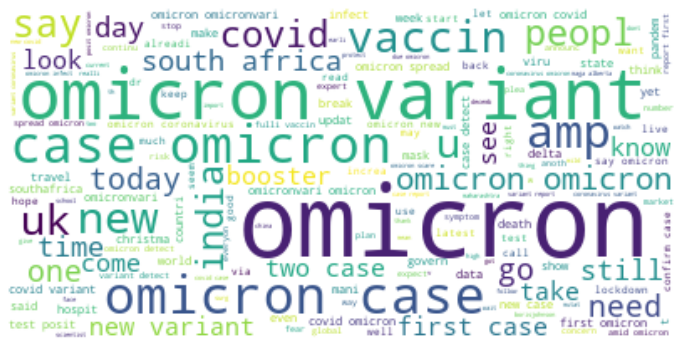

In [25]:
# WORDCLOUD THAT SHOWS THE MOST USED WORDS IN THE DATA
text = ' '.join(i for i in df.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

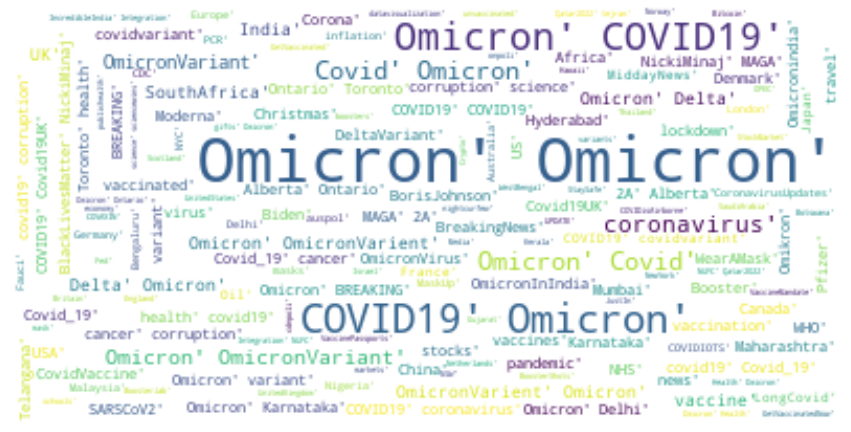

In [27]:
text = ' '.join(i for i in df.hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [29]:
# CALCULATE THE SENTIMENT SCORES OF THE OMICRON DATA
nltk.download('vader_lexicon')
sent = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/robsontrajano/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [30]:
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [32]:
df['Positive'] = [sent.polarity_scores(i)['pos'] for i in df.text]
df['Negative'] = [sent.polarity_scores(i)['neg'] for i in df.text]
df['Neutral'] = [sent.polarity_scores(i)['neu'] for i in df.text]
df = df[['text', 'Positive', 'Negative', 'Neutral']]
df.head(10)

/var/folders/83/_gttb8hn67dfsswspxfpc23w0000gn/T/ipykernel_11957/295193545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Positive'] = [sent.polarity_scores(i)['pos'] for i in df.text]
/var/folders/83/_gttb8hn67dfsswspxfpc23w0000gn/T/ipykernel_11957/295193545.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Negative'] = [sent.polarity_scores(i)['neg'] for i in df.text]
/var/folders/83/_gttb8hn67dfsswspxfpc23w0000gn/T/ipykernel_11957/295193545.py:3: SettingWithCopyWarning: 
A value is trying 

,text,Positive,Negative,Neutral
0,skynew told id back omicron “odium medicum ins...,0.160,0.000,0.840
1,someon told octob omicron,0.000,0.000,1.000
3,autom system becom increas complex effort test...,0.000,0.000,1.000
5,digitaldisrupt emerg technolog stay privat inv...,0.000,0.000,1.000
7,fatigu head bodi ach occasion sore throat coug...,0.000,0.172,0.828
9,biden vaccin rule health worker block statese...,0.000,0.326,0.674
11,follow develop omicron covid variant detect c...,0.000,0.000,1.000
16,reduc socialcontact interact could help save h...,0.349,0.000,0.651
17,themorningnew drug driver hit polic car two r...,0.000,0.179,0.821
19,hjellebrian keep u date look like omicron arou...,0.200,0.000,0.800


In [34]:
# LET'S SEE HOW MOST PEOPLE REACTED TO THE OMICRON VARIANT
x = sum(df.Positive)
y = sum(df.Negative)
z = sum(df.Neutral)

def sent_score(a, b, c):
    if a > b and a > c:
        return 'Positive'
    elif b > a and b > c:
        return 'Negative'
    else:
        return 'Neutral'

print(f"Most tweeters who posted about Omicron were {sent_score(x, y, z)} about it.")

Most tweeters who posted about Omicron were Neutral about it.
